# Exploratory Data Analysis Notebook
- Visualizes data with histograms and time series plots
- Identifies highly correlated fields and variance inflation factors
- Finds where data is missing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", context="notebook")

In [3]:
df = pd.read_csv("../data/bitcoin.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date").reset_index(drop=True)

print(df.shape)
df.head()

(2920, 24)


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,0.000032,2.527738,0.0,0.0,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,0.000036,3.781179,0.0,0.0,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,0.000028,3.781179,0.0,0.0,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,0.000032,3.781179,0.0,0.0,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,0.000033,3.781179,0.0,0.0,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


In [4]:
df.describe(include="all").transpose()

,count,mean,min,25%,50%,75%,max,std
Date,2920,2014-02-21 12:00:00,2010-02-23 00:00:00,2012-02-22 18:00:00,2014-02-21 12:00:00,2016-02-21 06:00:00,2018-02-20 00:00:00,NaN
btc_market_price,2920.0,897.485562,0.0,6.76875,236.31,603.90905,19498.683333,2400.159935
btc_total_bitcoins,2920.0,11520514.01113,2110700.0,8405100.0,12429100.0,15237637.5,16876825.0,4200938.303551
btc_market_cap,2920.0,14430217961.981831,0.0,55605880.6434,3364729590.0,8210042352.75,326525438567.0,40292628757.478905
btc_trade_volume,2899.0,82311567.561618,0.0,299431.55585,10243644.9346,29348231.0603,5352015515.54,311664183.439729
btc_blocks_size,2920.0,36058.374765,0.0,777.25,15132.0,59301.75,157664.996336,44536.901058
btc_avg_block_size,2920.0,0.355733,0.000216,0.024595,0.199806,0.688036,1.110327,0.356388
btc_n_orphaned_blocks,2920.0,0.362329,0.0,0.0,0.0,0.0,7.0,0.840614
btc_n_transactions_per_block,2920.0,677.010924,1.0,55.0,378.5,1238.569055,2722.625,689.042018
btc_median_confirmation_time,2920.0,7.547221,0.0,6.129167,7.933333,10.2375,47.733333,4.956135


In [5]:
# identify columns with little variance
low_var = []
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].nunique() <= 100:
        low_var.append(col)

print("Low/constant variance features:", low_var)

Low/constant variance features: ['btc_n_orphaned_blocks']


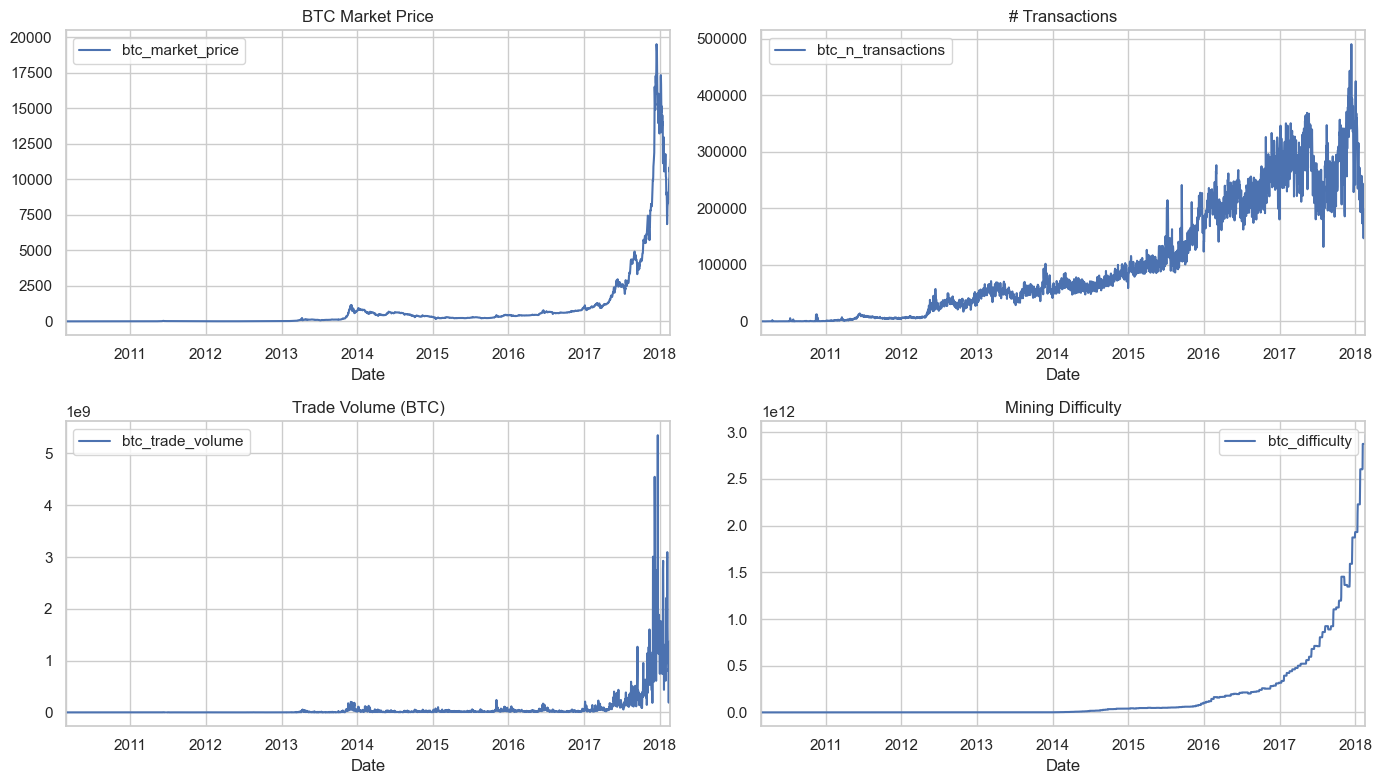

In [6]:
# time series plots
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
df.plot(x="Date", y="btc_market_price", ax=ax[0,0], title="BTC Market Price")
df.plot(x="Date", y="btc_n_transactions", ax=ax[0,1], title="# Transactions")
df.plot(x="Date", y="btc_trade_volume", ax=ax[1,0], title="Trade Volume (BTC)")
df.plot(x="Date", y="btc_difficulty", ax=ax[1,1], title="Mining Difficulty")
plt.tight_layout()

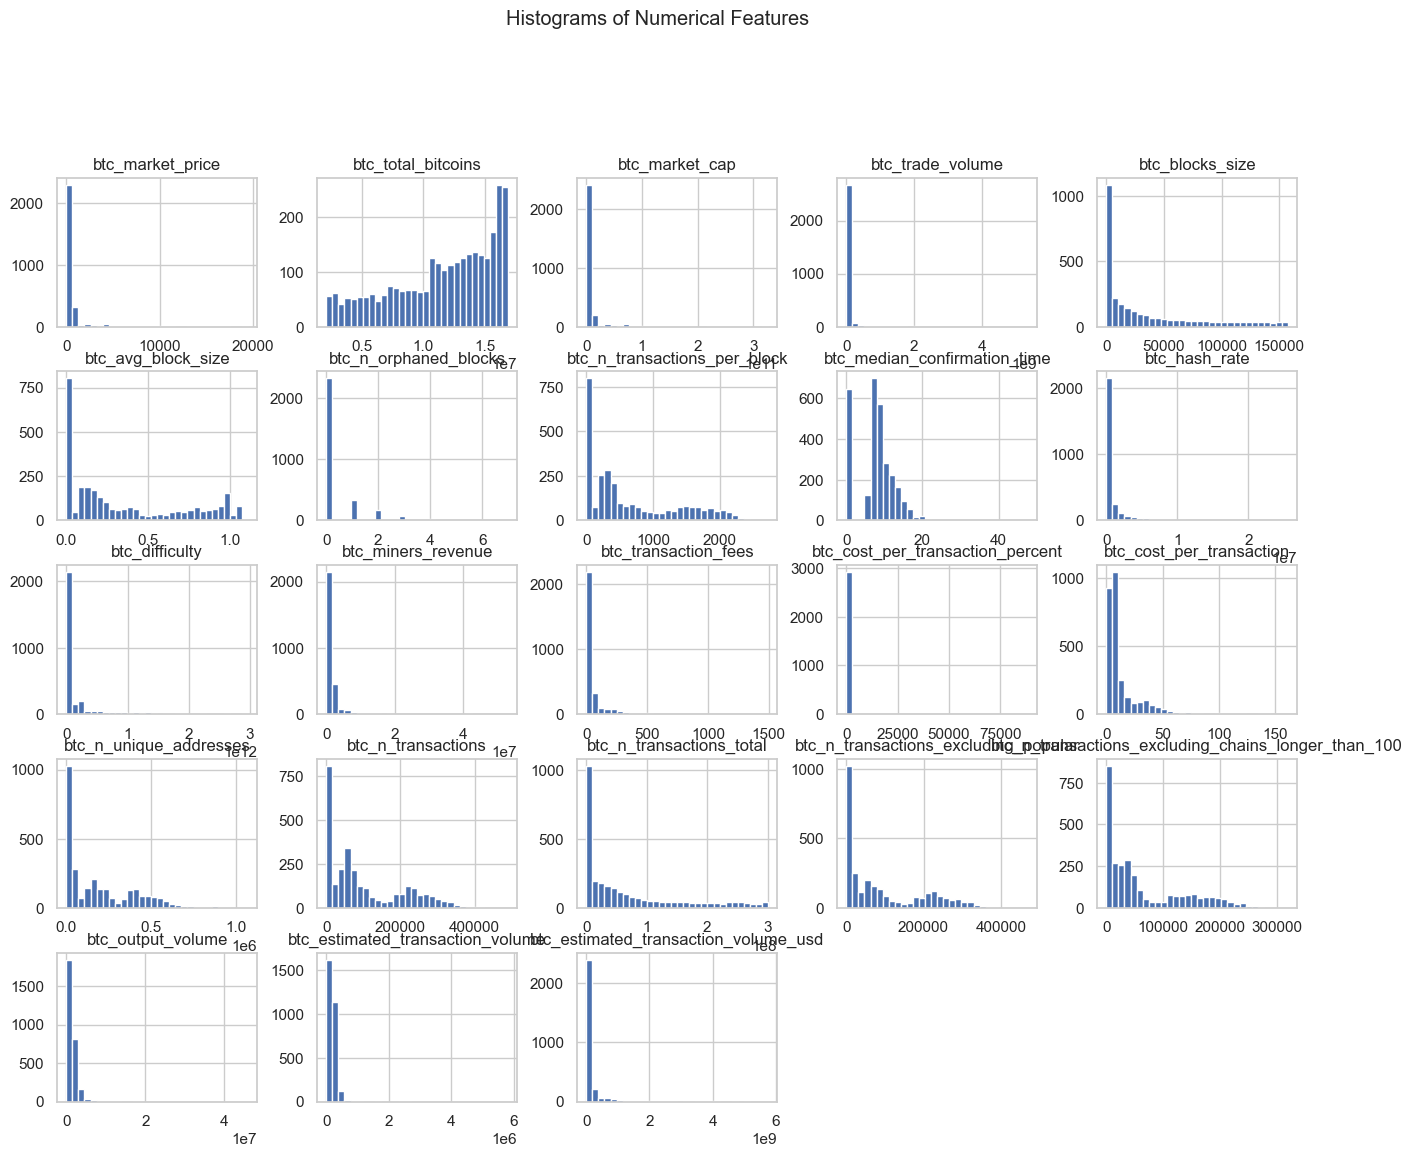

In [7]:
# histograms
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=30, figsize=(16, 12))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

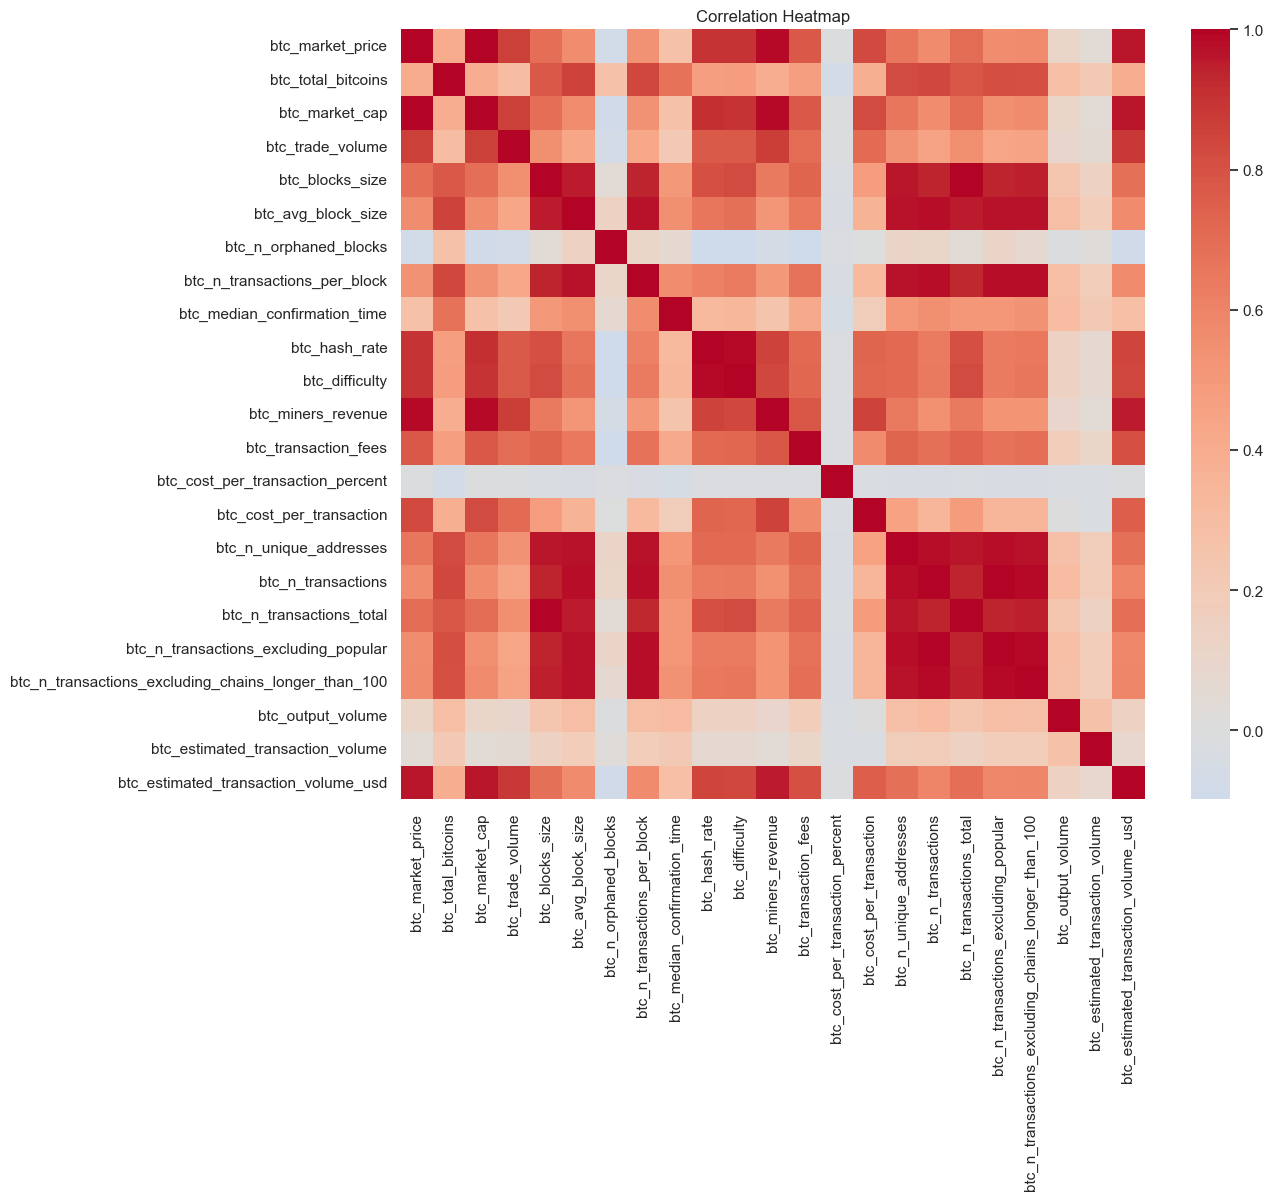

In [27]:
# correlation matrix
plt.figure(figsize=(12, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap")
plt.savefig(f"../figures/correlation_heatmap.png", dpi=150)
plt.show()

# export for report
corr.to_csv("../outputs/corr_matrix.csv")

In [9]:
high_corr = []
threshold = 0.95
for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i,j]) > threshold:
            if (j, i, corr.loc[j, i]) not in high_corr:
                high_corr.append((i,j, corr.loc[i,j]))

# highly correlated pairs
high_corr

[('btc_market_price', 'btc_market_cap', 0.9997982492812335),
 ('btc_market_price', 'btc_miners_revenue', 0.9854031104430181),
 ('btc_market_price',
  'btc_estimated_transaction_volume_usd',
  0.9600155295078171),
 ('btc_market_cap', 'btc_miners_revenue', 0.9839901663574439),
 ('btc_market_cap',
  'btc_estimated_transaction_volume_usd',
  0.9599323540760721),
 ('btc_blocks_size', 'btc_avg_block_size', 0.9554185046495822),
 ('btc_blocks_size', 'btc_n_unique_addresses', 0.9598696278450234),
 ('btc_blocks_size', 'btc_n_transactions_total', 0.9997956436186954),
 ('btc_blocks_size',
  'btc_n_transactions_excluding_chains_longer_than_100',
  0.9526079329694341),
 ('btc_avg_block_size', 'btc_n_transactions_per_block', 0.9740953309464344),
 ('btc_avg_block_size', 'btc_n_unique_addresses', 0.9664397263704001),
 ('btc_avg_block_size', 'btc_n_transactions', 0.9745070622592945),
 ('btc_avg_block_size', 'btc_n_transactions_total', 0.953758242717888),
 ('btc_avg_block_size',
  'btc_n_transactions_exc

In [29]:
# calculate variance inflation factors
X = df[num_cols].drop(columns=["btc_market_price"], errors="ignore").dropna()
X_const = add_constant(X)

vif_data = pd.DataFrame({
    "feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
})

# export for report
vif_data.sort_values("VIF", ascending=False).head(20).to_csv("../outputs/vif_table.csv", index=False)

vif_data.sort_values("VIF", ascending=False).head(20)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
4,btc_blocks_size,9049.189939
17,btc_n_transactions_total,9036.116336
2,btc_market_cap,259.809324
11,btc_miners_revenue,249.204785
10,btc_difficulty,231.037035
16,btc_n_transactions,216.278259
9,btc_hash_rate,159.773904
18,btc_n_transactions_excluding_popular,131.720348
19,btc_n_transactions_excluding_chains_longer_tha...,103.191960
15,btc_n_unique_addresses,97.442640


In [11]:
# missing values
missing_summary = df.isna().sum().sort_values(ascending=False)
missing_summary = missing_summary[missing_summary > 0]
print(missing_summary)

# export for report
missing_summary.to_csv("../outputs/missing_summary.csv")

btc_trade_volume    21
dtype: int64


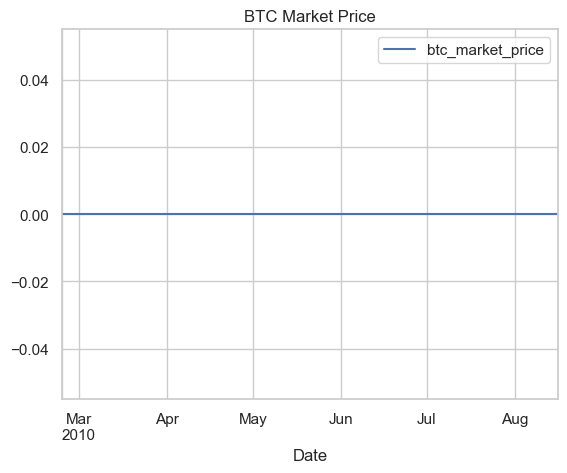

In [12]:
# dates where price is zero
df[df['btc_market_price'] == 0].plot(x="Date", y="btc_market_price", title="BTC Market Price")
plt.show()